# Introduction to predictive modeling

## Predictions
In common parlance, prediction means to forecast a future event.  In data science, prediction means to estimate an unknown value, which could be in the future, but also in the present or the past.  The unknown value could be a number, or a category (eg, sheep, elephant, or cat).

Predictive modeling is different from descriptive modeling.  The primary purpose of descriptive modeling is not to predict something but instead to gain insight into the underlying phenomenon or process.  

A descriptive model would be judged on its intelligibility, its ability to explain the causal relationships of the data, etc (eg, why do customers leave?).  Descriptive models would use descriptive statistics such as mean, median, variance, correlations etc that we covered in the first chapter.  

Predictive models are judged on the basis of their predictive power (eg, which customers will leave?).  

## Predictive Modeling

Predictive modeling involves predicting a variable of interest relating to an observation, based upon other attributes we know about that observation.  One approach to doing so is to start by specifying the structure of the model with certain numeric parameters left unspecified.  These ‘unspecified parameters’ are then calculated in a way as to fit the available data as closely as possible.  This general approach is called _parametric modeling_, as we learn the parameters of the model from the training data.  

There are other approaches as well, for example with decision trees we find ever more ‘pure’ subsets by partitioning data based on the independent variables.  These approaches are called non-parametric modeling.  

_Source: Data Science for Business, Provost et al_

## What is a model?
A model is a representation or simplified version of a concept, phenomenon, relationship, or system of the real world.

Models:  
 - help understanding by simplifying complexity  
 - aid in decision making by simulating 'what if' scenarios  
 - explain, control, and predict events on the basis of past observations.  

For analytics, models are mathematical representations of relationships that allow us to study, predict and profit from those relationships.  A model ultimately represents a formula for estimating the unknown value of interest.  Fitting a model is akin to identifying the relationship, or the pattern of interest.

## Maching Learning  
Machine Learning: A machine-learning system is trained rather than explicitly programmed. It’s presented with many examples relevant to a task, and it finds statistical structure in these examples that eventually allows the system to come up with rules for automating the task.

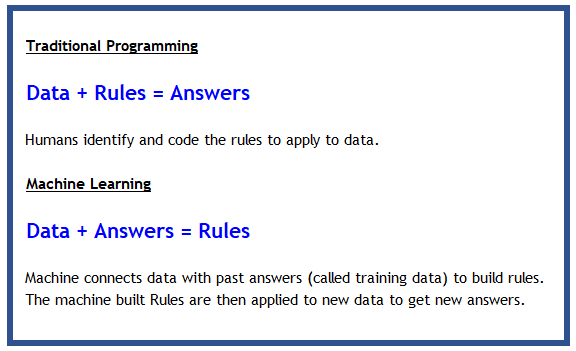


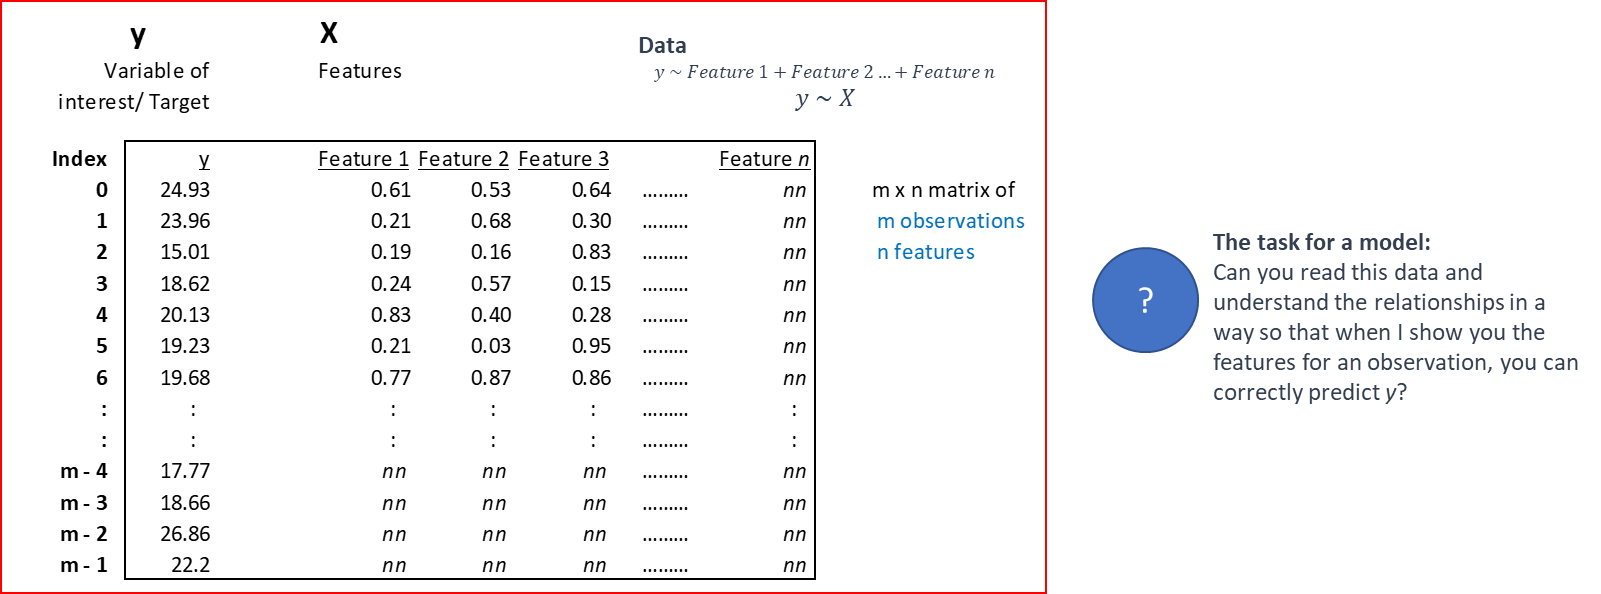

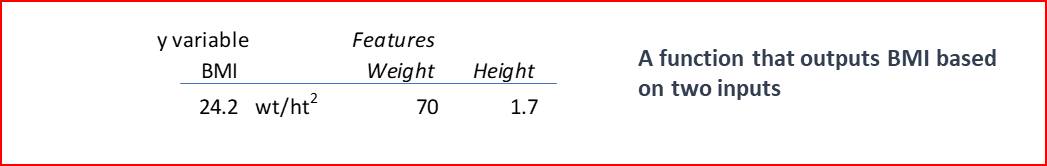

In some ways, building a model is akin to finding a function to describe a relationship, except that algorithm driven models allow us tremendous flexibility in the range of functions that can be modeled.  

Models cannot always be expressed as neat functions though, and can be black-boxy, expressible only as a ‘model object’ that has a $\texttt{predict()}$ method.


## Supervised vs Unsupervised Learning  

When we perform predictive analytics, we are trying to solve one of the following three types of problems: regression, classification, or clustering.  The first two fall under the umbrella of _supervised learning_, because the machine learns from examples we provide it.  The last one, clustering, is called _unsupervised learning_ because the machine figures out groups of mathematically similar items without requiring examples.

 1. Supervised Learning – learn from examples
       1. **Regression**: Estimate a numerical value for a continuous variable
            - Example: estimate property values
       2. **Classification**: Identify a category to which an observation belongs
            - Example: predict whether a customer would respond to an offer or not

 2. Unsupervised Learning – identify patterns in data without examples  
       3. **Clustering**: Group similar items together  
            - Example: create groups of similar news items  

## Training and Test Data Sets

When given data, we would normally not give our algorithm access to the entire data set to learn from it.  That would be highly unusual.

In fact, we would ‘hide’ a part of the data, and use this as the ‘test’ data set to check how well our model generalizes.  

This is because models being greedy in their optimization will memorize the data they see, and fail to work outside the examples they have seen.  

The data used to train our model is called the **training set**.

Once trained, we evaluate our model on the **test set**.

Sometimes, in data rich situations, the test data set is further split into two:  

 - The validation set: We use this to identify the best performing model, tune hyperparameters for neural nets.  As we do this, information from the validation set is ‘leaking’ to the model as it is being optimized a little for the validation set too.  

- The test set: This is the final data set which stays completely unseen from the model, and used to calculate accuracy, standard errors etc.         
  
  
**_A word from the experts [from the book ‘Elements of Statistical Learning’]_**:

 - If we are in a data-rich situation, the best approach for both problems is to randomly divide the dataset into three parts: a training set, a validation set, and a test set. 
    - The training set is used to fit the models; 
    - the validation set is used to estimate prediction error for model selection; the test set is used for assessment of the generalization error of the final chosen model. 
    - Ideally, the test set should be kept in a "vault", and be brought out only at the end of the data analysis. 
 - Suppose instead that we use the test-set repeatedly, choosing the model with smallest test-set error. Then the test set error of the final chosen model will underestimate the true test error, sometimes substantially. 
 - It is difficult to give a general rule on how to choose the number of observations in each of the three parts, as this depends on the signal-to-noise ratio in the data and the training sample size. A typical split might be 50% for training, and 25% each for validation and testing

_Source: Elements of Statistical Learning, Tibsharani and others
Available for free download at https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12_toc.pdf_

## Objective Functions  

Algorithms optimize parameters by focusing on an objective function, which is often called the ‘loss function’, or the ‘cost function’.  Sometimes, _loss function_ is a term that is applied to a single observation, and _cost function_ is used for the entire dataset (Source: Andrew Ng).  

In practice, you may hear the terms loss function, cost function and objective functions used interchangeably.  All of these are the mathematical expression of the goal we are trying to optimize for.  

What we do with any kind of objective function is generally try to minimize it. (Maximizing can be accommodated by putting a minus sign in front of the function and minimizing.)

Minimization is easier if the function is continuous and differentiable.

- For OLS regression, we minimize the $Loss Function = (y - \hat{y})^2$  

- For logistic regression binary classification, a loss function often used is the log-loss function:
$ -(y.log(\hat{y}) + (1-y)log(1-\hat{y}))$.  

Remember, $log(1) = 0$  

$\hat{y}$ is the prediction, and $y$ is the observed actual value.  

## Distance Measures

A very fundamental concept when trying to identify patterns across data points is the ability to measure how similar or dissimilar data points are.  This is done using the concept of _distance_ - the more dissimilar things are, the farther away they are from each other and their distance is greater, and the more similar they are, the closer the distance between them will be.

The question then is - how do you measure distance?

Distance calculations come into play in several algorithms, particularly those that leverage the idea of finding ‘nearest neighbors’.  An observation is described by its features X.  If there are two observations, for example consider two diamonds below with their features described as below, what is the distance between the two?

In [15]:
import seaborn as sns
sns.load_dataset('diamonds').sample(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
39548,0.32,Ideal,G,VVS1,61.1,57.0,1080,4.43,4.41,2.7
20471,1.04,Premium,G,IF,60.7,58.0,8813,6.65,6.52,4.0


In [16]:
sns.load_dataset('diamonds')

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [17]:
from sklearn.metrics import pairwise_distances
X = sns.load_dataset('diamonds').sample(4).iloc[:, -6:]
pairwise_distances(X, metric='cosine')

array([[3.33066907e-16, 1.70342004e-05, 1.29401779e-03, 2.52777611e-03],
       [1.70342004e-05, 0.00000000e+00, 1.11620280e-03, 2.28698020e-03],
       [1.29401779e-03, 1.11620280e-03, 0.00000000e+00, 2.08523641e-04],
       [2.52777611e-03, 2.28698020e-03, 2.08523641e-04, 0.00000000e+00]])

Fortunately, **Scikit Learn** provides us multiple ways to calculate distance.  

 - **Euclidean distance** is the most commonly used distance metric.  It is the straight line distance between two points.  

 - **Minkowski distance** (default for sklearn) is a more flexible measure where different results can be obtained by varying a parameter _p_.  Minkowski distance is identical to Euclidean distance when p=2.

The choice of the distance metric depends upon the use case.

The following distance measures are available from sklearn.

### Common distance measures

| identifier | class name | args | distance function | 
| -- | --  | -- | -- | 
| "euclidean" | EuclideanDistance |  | sqrt(sum((x - y)^2)) | 
| "manhattan" | ManhattanDistance |  | sum(\|x - y\|) | 
| "chebyshev" | ChebyshevDistance |  | max(\|x - y\|) | 
| "minkowski" | MinkowskiDistance | p | sum(\|x - y\|^p)^(1/p) | 
| "wminkowski" | WMinkowskiDistance | p, w | sum(\|w * (x - y)\|^p)^(1/p) | 
| "seuclidean" | SEuclideanDistance | V | sqrt(sum((x - y)^2 / V)) | 
| "mahalanobis" | MahalanobisDistance | V or VI | sqrt((x - y)' V^-1 (x - y)) | 


_Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html_

### Cosine distance
In addition, _cosine distance_ is often used for measuring the similarity between pieces of text.

Cosine similarity is a measure of the angle between two vectors. 
Cosine similarity is useful in measuring the similarity between pieces of text.

$\mbox{Cosine Similarity} = cos\theta = (r.s)/(|r||s|)$


where `r` and `s` are two vectors, `r.s` is the dot product of the two vectors, and `|r|` and `|s|` are the sizes of the vectors.

_Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html_

**Interpreting the cosine distance**  
If two observations were to be plotted as vectors, the cosine distance is merely the cosine of the angle between the vectors.

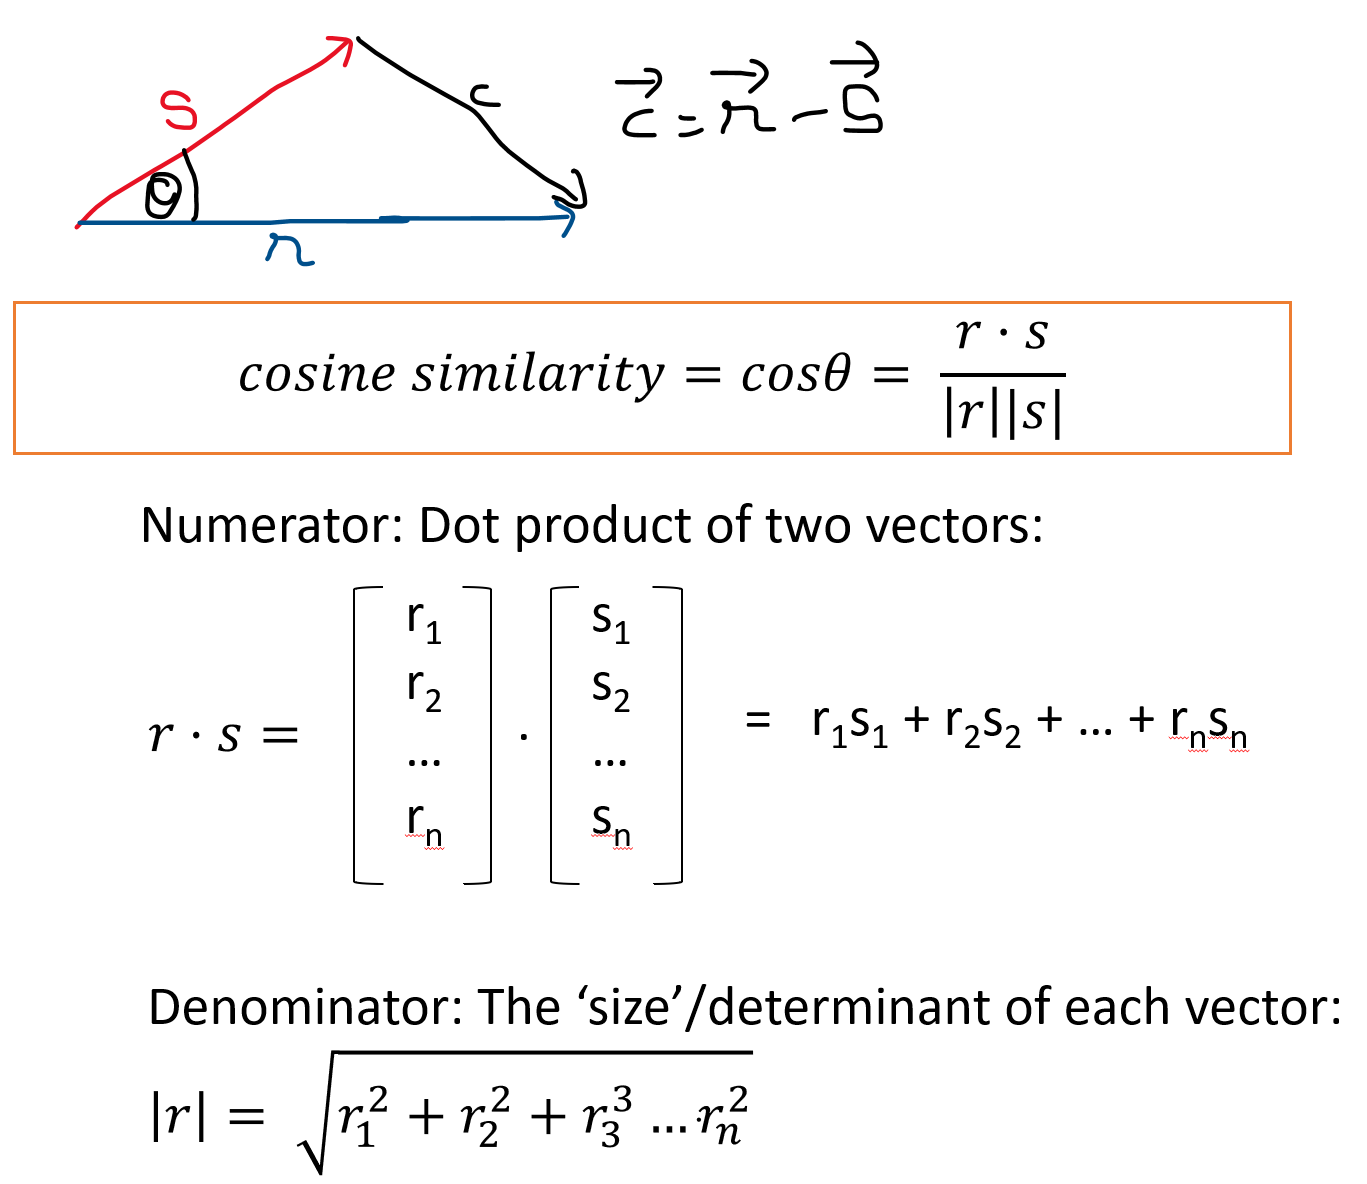

**What it tells us:**  
If we know the dot product of two vectors, and their magnitudes, we can calculate the angle between the vectors using the above relationship (and the cosine_similarity function described in the prior slide).  Cosine similarity varies between -1 and +1 (theoretically).  However, for words and text vectors are generally positive which means similarity varies between 0 and 1.  

Some important relationships to know:

 - cos 0$^\circ$ = 1 (means the vectors overlap)
 - cos 90$^\circ$ = 0 (means the vectors are perpendicular to each other, or orthogonal)
 - cos 180$^\circ$ = -1 (means the vectors point in opposite directions)
 - cos (180$^\circ$ + $\theta$) = - cos$\theta$  
 - know that 180 degrees = $\pi$ radians


**Cosine distance vs cosine similarity**  
Sometimes you might hear of cosine similarity as opposed to cosine distance.  

Cosine distance = 1 – cosine similarity

Logic is that when the similarity is 1, distance is 0, or when they are orthogonal (90 degrees), then the distance is 1.


## Model Evaluation

Evaluating a model means assessing its performance.  Model evaluation answers the question whether the model predictions are good.

Model evaluation helps us establish whether the model is useful at all, and also compare it with other models, or the same model over time.

Model evaluation is relatively straightforward for regression models where a continuous variable is predicted, as we can compare predicted values to actual values.

Evaluation is trickier for classification problems as several additional factors come into play.  We will examine the tools available to assess classifiers.

### Evaluating Regression Models

Conceptually, regression models are relatively easy to evaluate.  You already know the actual observed number, and you also know the predicted number.  The model is good if the two are close together, and not good if otherwise.  Metrics for evaluating regression are all a play on this basic idea, some express the difference between the actual and predicted as a percentage (MAPE), others take the average squared difference (MSE and RMSE), and yet others the average absolute difference (MAE).

The main metrics used to evaluate regression models are MAE, MSE and RMSE, and occasionally MAPE.

**MAE: Mean Absolute Error**  
$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$

**MSE: Mean Squared Error (MSE)**  
$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$

**RMSE: Root Mean Squared Error (RMSE)**  
The square root of MSE above 

**Mean Absolute Percentage Error (MAPE)**  
$\text{MAPE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \frac{{}\left| y_i - \hat{y}_i \right|}{\max(\epsilon, \left| y_i \right|)}$

_Source: https://scikit-learn.org/stable/modules/model_evaluation.html_

The above URL lists many more evaluation metrics.  

Consider the below dataset, where the first two columns represent the miles per gallon - actuals, versus those obtained as predictions through a model.  The remaining columns show how the calculations can be performed to obtain the evaluation metrics above.  

We can also calculate the same metrics using Python, and the code that follows illustrates the same results.

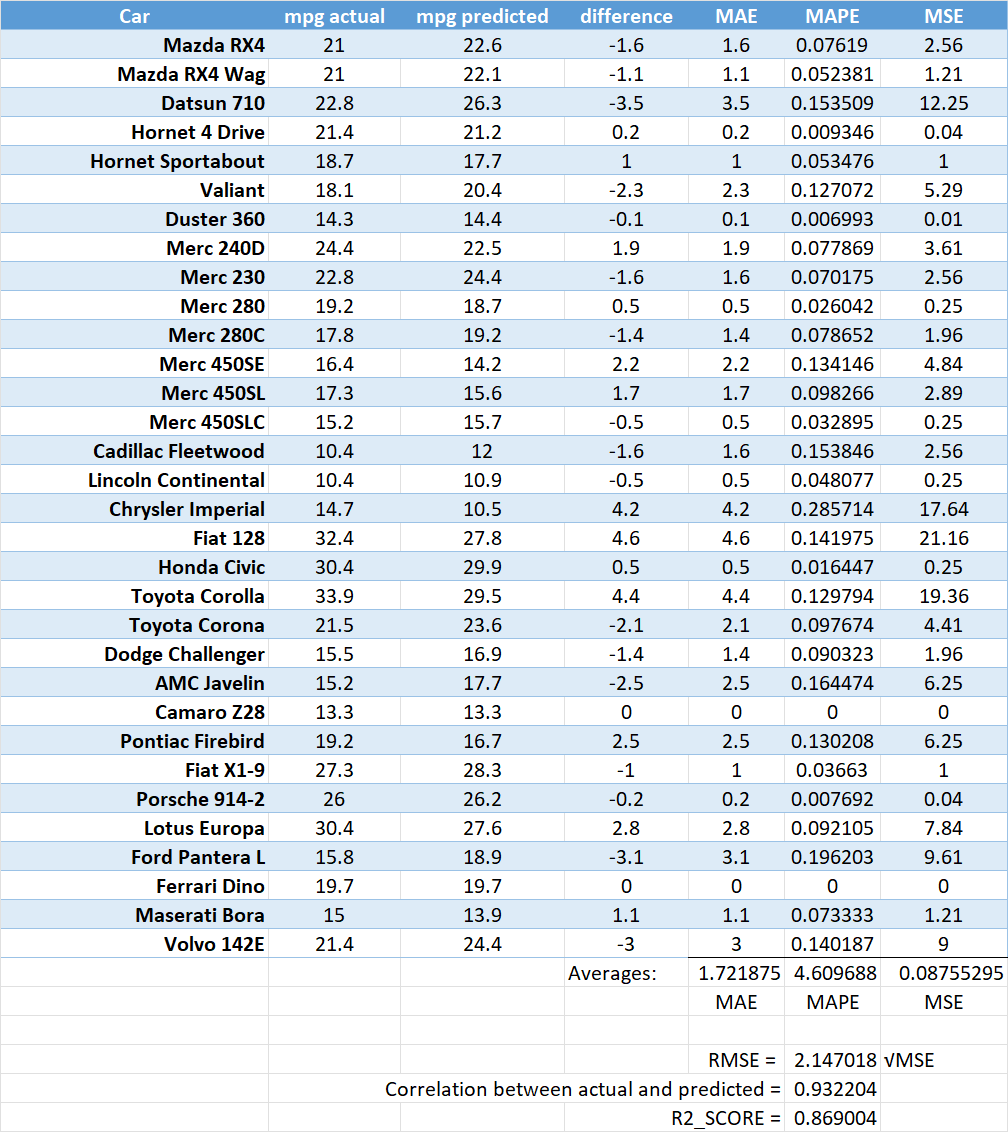


**Same evaluation metrics computed using sklearn** 

In [18]:
import numpy as np
import pandas as pd

y_true = np.array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])
y_pred = np.array([22.6, 22.1, 26.3, 21.2, 17.7, 20.4, 14.4, 22.5, 24.4, 18.7, 19.2,
       14.2, 15.6, 15.7, 12. , 10.9, 10.5, 27.8, 29.9, 29.5, 23.6, 16.9,
       17.7, 13.3, 16.7, 28.3, 26.2, 27.6, 18.9, 19.7, 13.9, 24.4])

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , mean_absolute_percentage_error, root_mean_squared_error, r2_score

In [27]:
MAE = mean_absolute_error(y_true, y_pred)
MSE = mean_squared_error(y_true, y_pred)
MAPE = mean_absolute_percentage_error(y_true, y_pred)
RMSE = root_mean_squared_error(y_true, y_pred)
r2_score = r2_score(y_true, y_pred)

print('MAE =', MAE)
print('MSE =', MSE)
print('MAPE =', MAPE)
print('RMSE =', RMSE)
print('r2_score =', r2_score)

MAE = 1.7218749999999994
MSE = 4.609687499999997
MAPE = 0.08755294792063525
RMSE = 2.1470182812449448
r2_score = 0.8690019373633044


### Evaluating Classification Models

Evaluating classification models is much more tricky.  This is because there are likely several categories, and the accuracy of prediction would depend upon how the categories are split in the population.  For example, if a condition, say a disease, occurs in only 1% of the population, then we can naively classify all observations as belonging to the category 'no-disease', and this predicdtion will be true in 99% of the cases.  

In order to evaluate classification models, we create what is called a ___Confusion Matrix___.  Understanding the Confusion Matrix is key to evaluating classification models.
Consider the prediction results produced by a spam classifier:

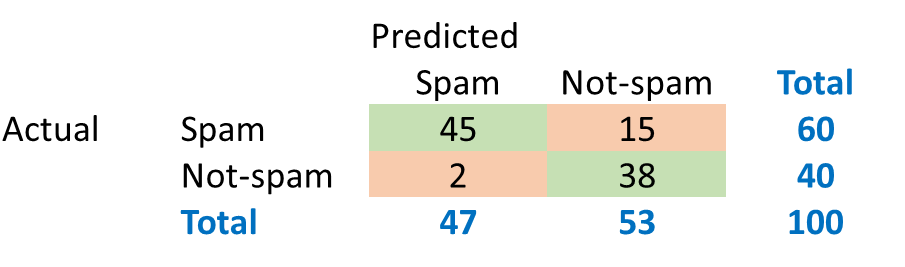


The green cells indicate observations that were classified correctly.

$Accuracy = (45+38)/100=83%$


The algorithm was able to classify 83% of the observations accurately.  This metric is called **‘accuracy’**.


Now consider a disease prediction algorithm which performs at a 95% accuracy.  How good is that?

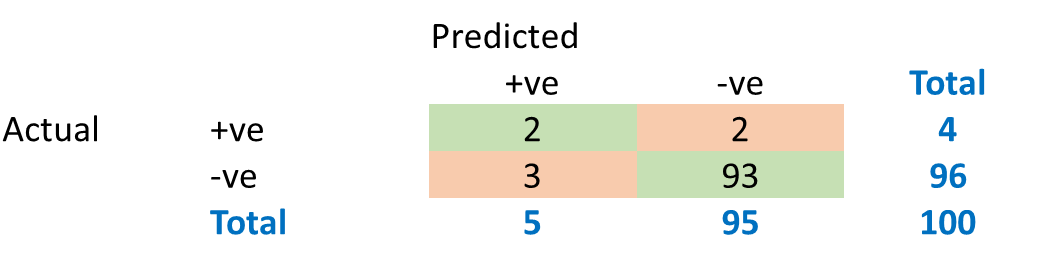

What would be the baseline performance of a naïve algorithm that classifies every case as –ve?


#### Understanding the Confusion Matrix  

Generally, we can consider a generic confusion matrix as follows:

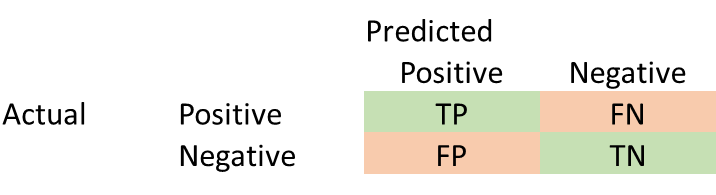

In addition to Accuracy, Precision and Recall are two other important metrics.

> Precision = TP/(TP + FP)  
> Recall = TP/(TP + FN)  


Recall is also called _sensitivity_, or _true positive rate_. _Precision_ is also called _Positive Predictive Value_.



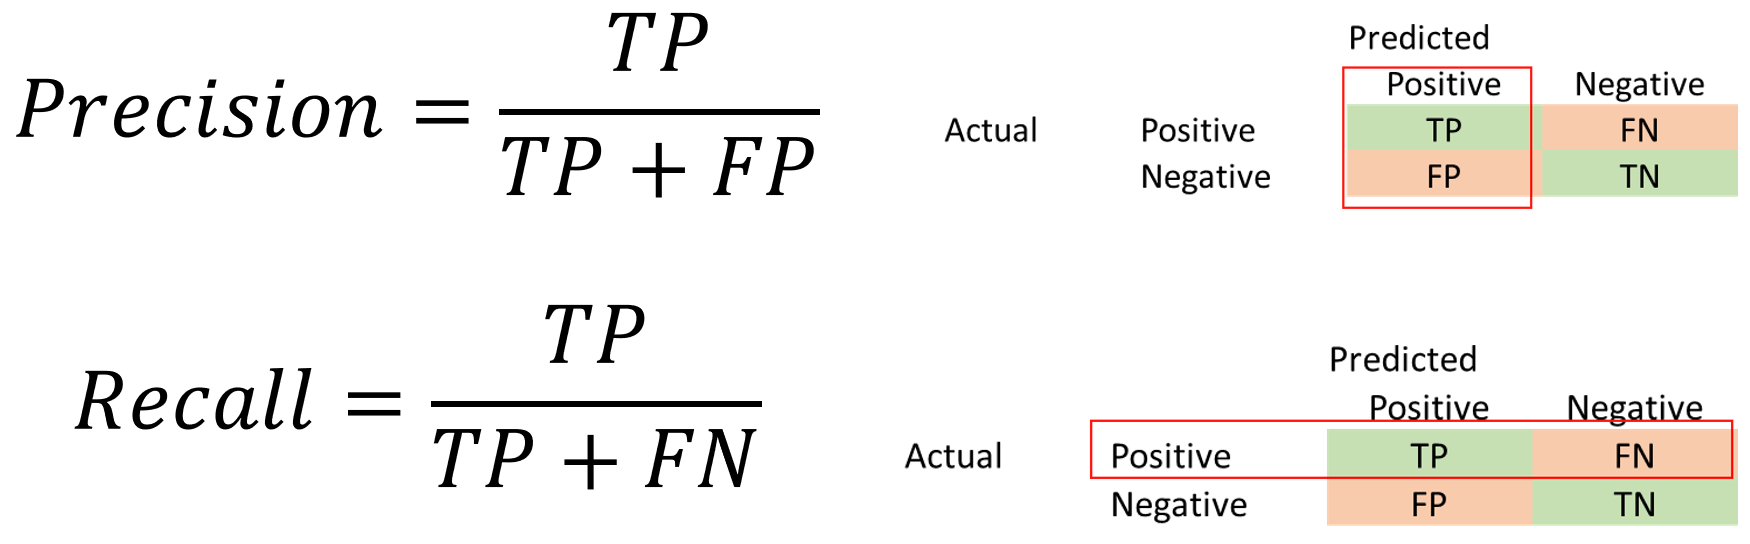

#### Other metrics based on the Confusion Matrix  

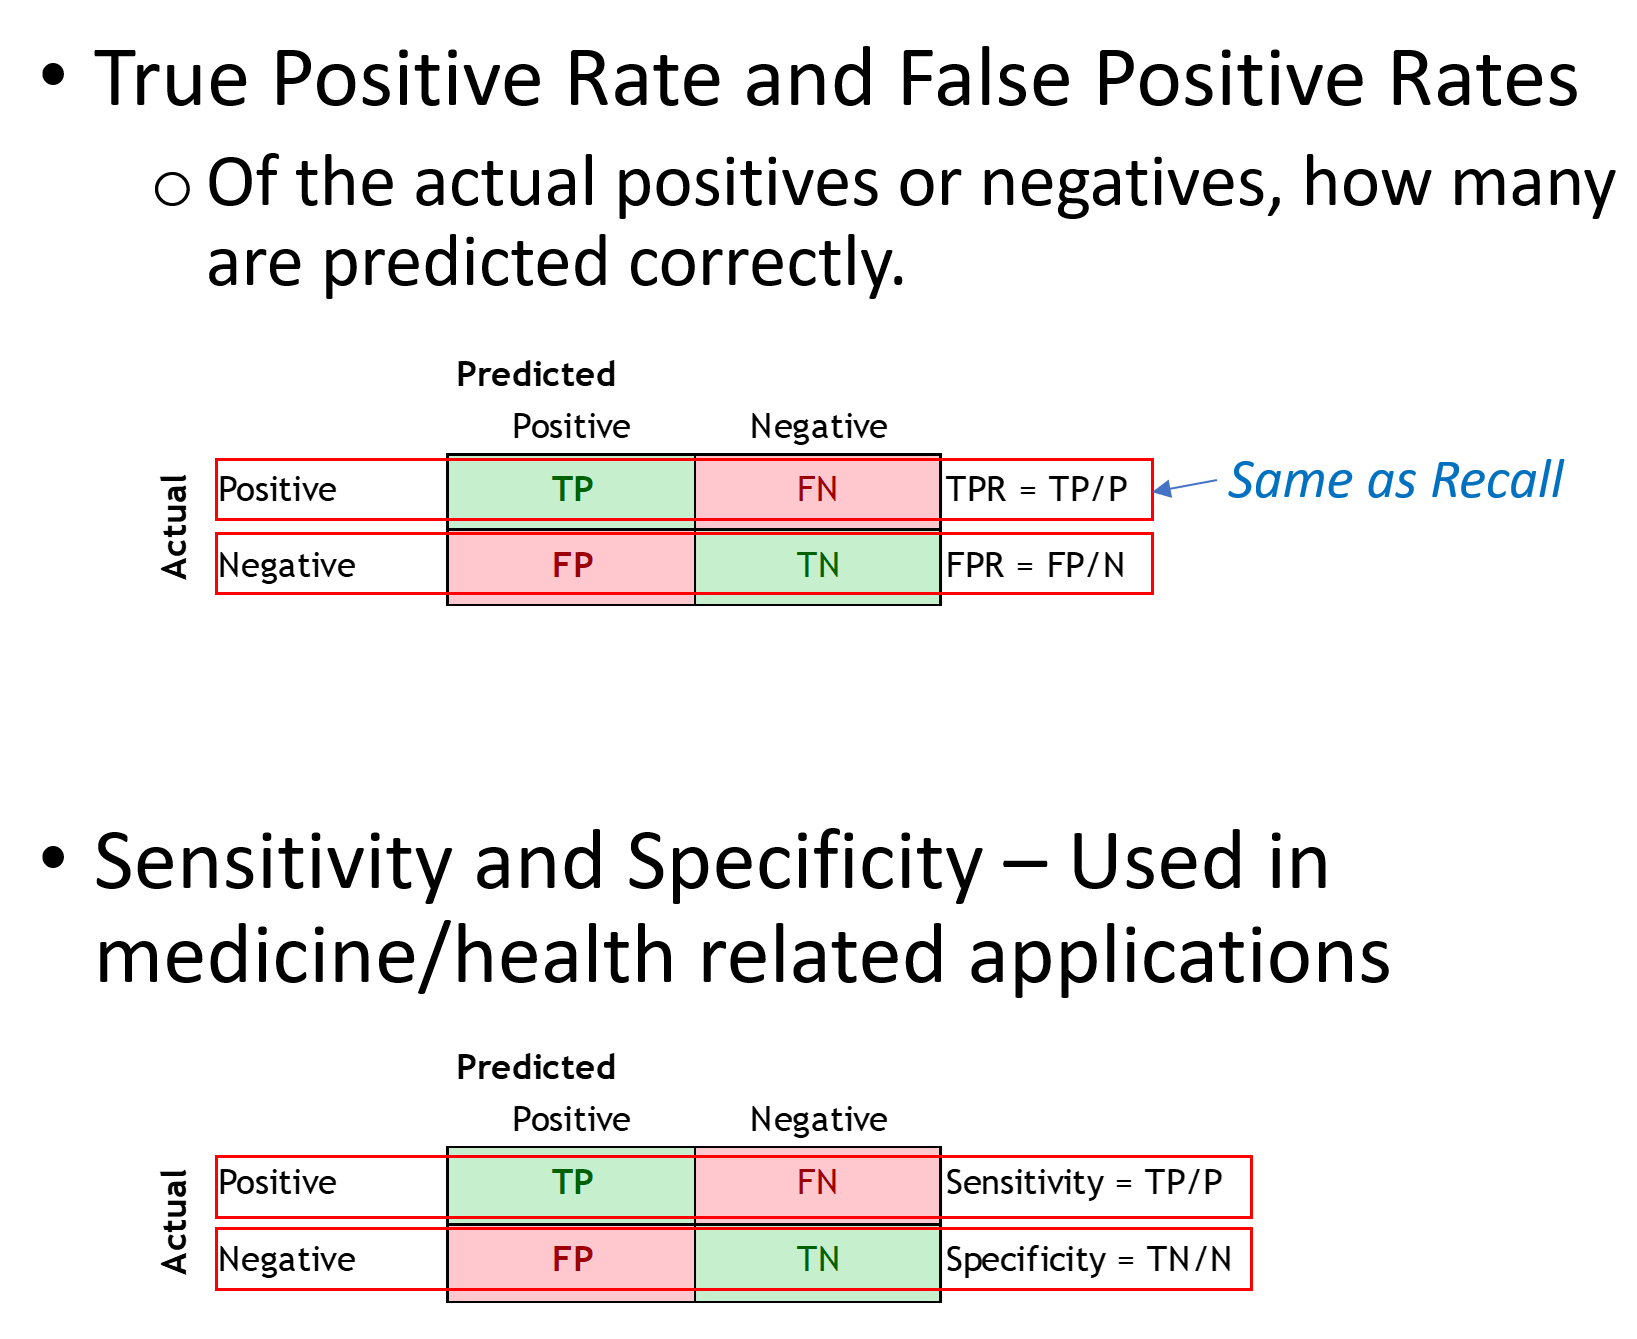

The choice of the metric depends upon your use case, and what kind of error (False Positive, or False Negative) are you more comfortable with.

In some cases, the cost of a False Positive may be quite high, for example, selecting customers for an expensive special offer.  
 **- High Precision is important**  
In other cases, the situation may be reversed, and you may not want any False Negatives, for example at airport security where you want to identify all positives even if it means flagging several false positives.  
 **- High Recall is important**  


#### Even More Metrics!  
The Confusion Matrix can be sliced in multiple ways, and various combinations of ratios calculated.  The Wikipedia has an interesting collection of a number of evaluation criteria – see graphic to the right.  

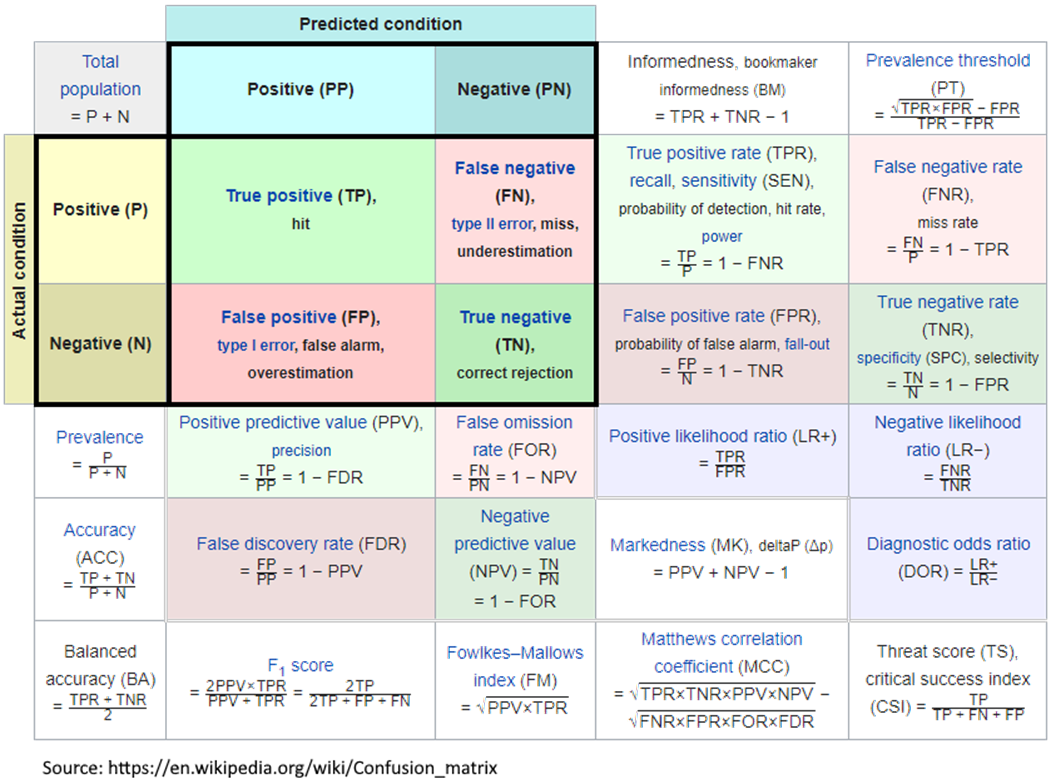


#### The Classification Report

The ‘Classification Report’ is a summary of key metrics.  As part of our model evaluation, we will be examining the classification report often.  Therefore it is important to understand this report.

Consider the below confusion matrix.

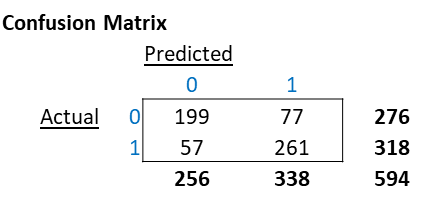

The classification report below is based on the Confusion Matrix above.

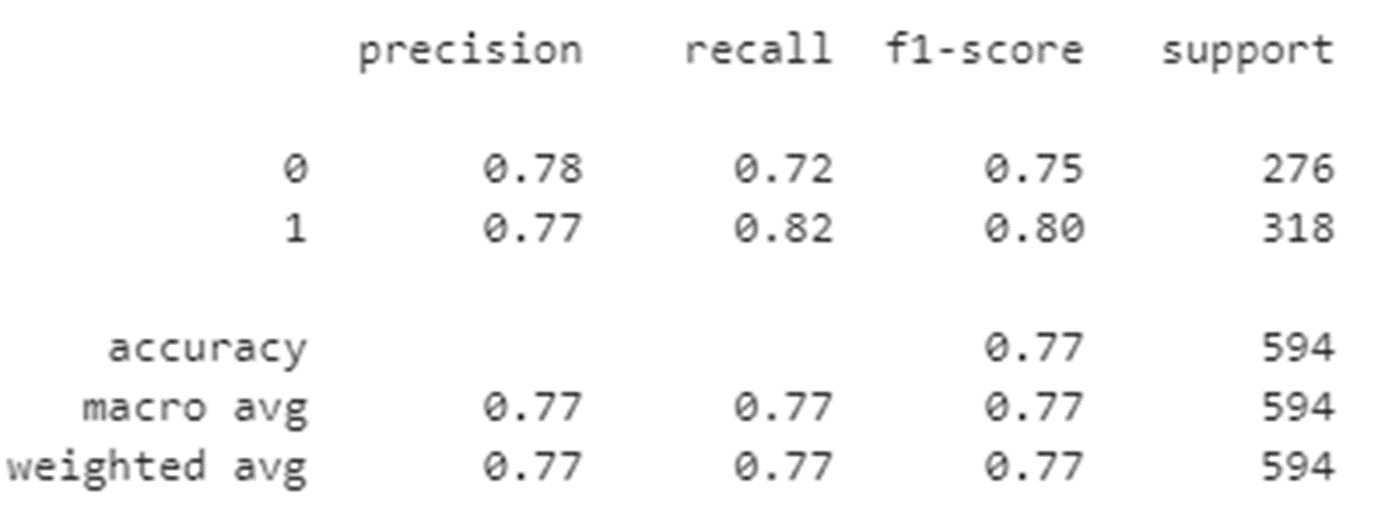


An explanation of how each element of the report is calculated appears in the graphic below.
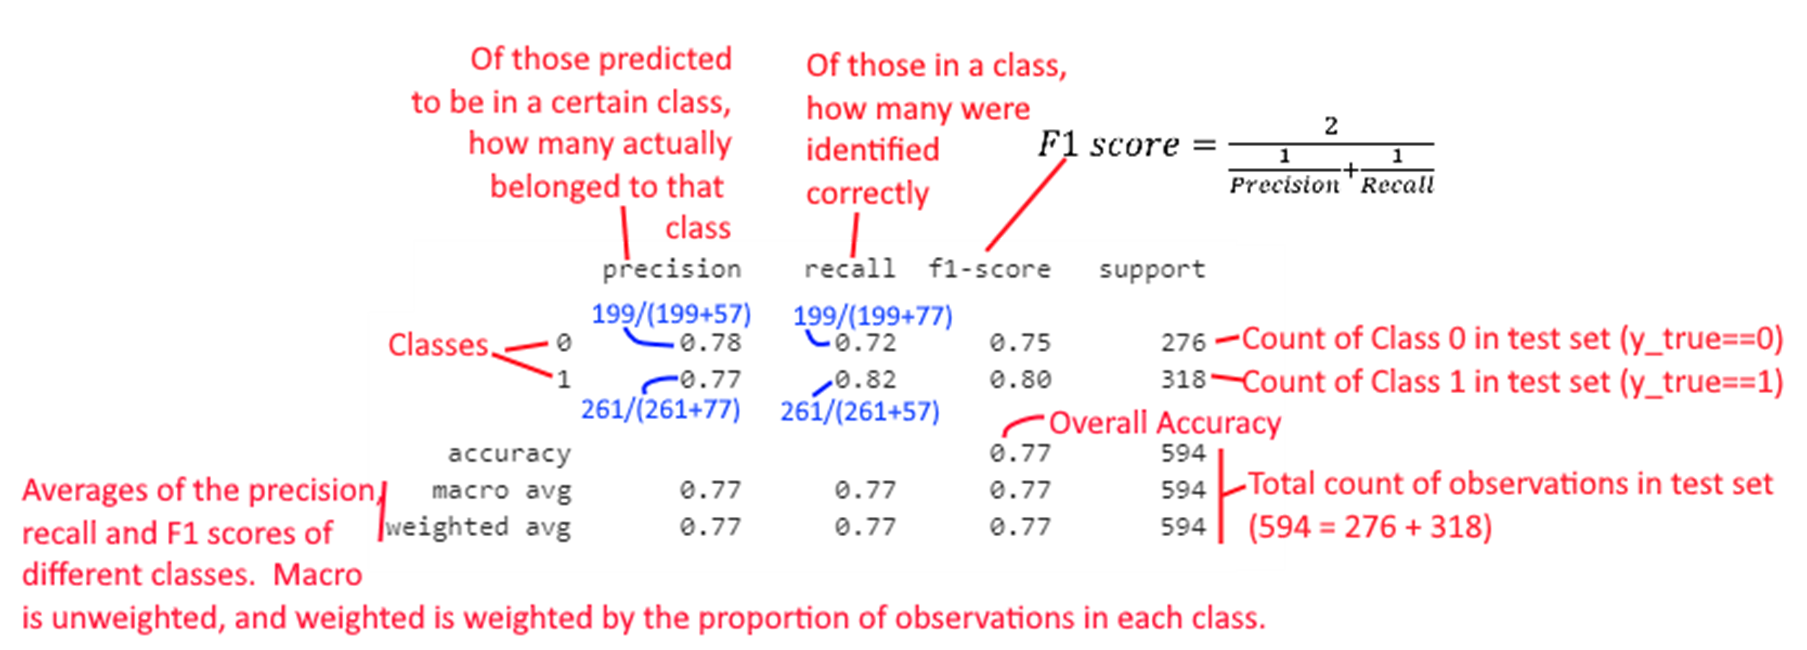


### The Base Rate from a Naive Classifier

To find out whether a classification model we have built has any ‘skill’ or not, we need to compare it to a naïve classifier.

For example, if a dataset has a 50:50 probability for a certain class, we can achieve 50% accuracy by simply tossing a coin, or drawing a random number.  (What would be the min expected accuracy for a population 99% of which belongs to a single category?)

The analyst should always do a sanity check by comparing model results to that of a ‘dummy classifier’.

Fortunately, the scikit learn library provides us just the function to establish such a base rate to allow us to do sanity checks.

`sklearn.dummy.DummyClassifier` implements several such simple strategies for classification:  
> `stratified` generates random predictions by respecting the training set class distribution.  
> `most_frequent` always predicts the most frequent label in the training set.  
> `prior` always predicts the class that maximizes the class prior (like most_frequent) and predict_proba returns the class prior.  (class prior is the probability that a random observation selected from the data belongs to a particular class)  
> `uniform` generates predictions uniformly at random.  
> `constant` always predicts a constant label that is provided by the user.  
  
_Source: https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators_

### The F1 Score
The F1 score brings together both precision and recall by combining them using the harmonic mean.

The harmonic mean is the ***inverse of the average of inverses***.

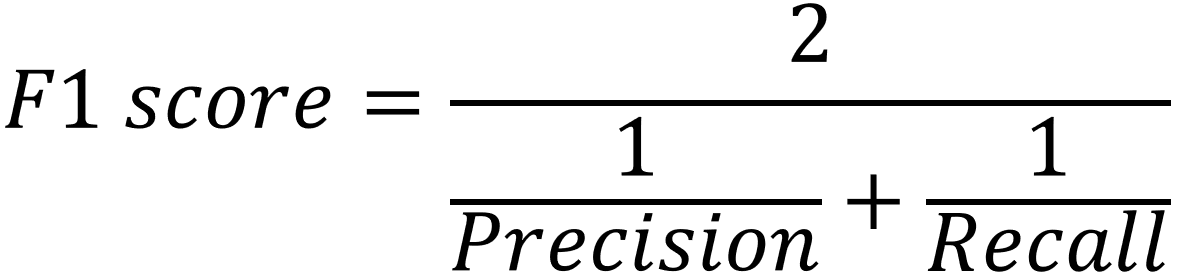

$F1 score = 2/(1/Precision + 1/Recall)$  
or,  

$F1 = 2 * (precision * recall) / (precision + recall)$

The F1 score can vary from 0 to 1, and a higher value is better.

### The ROC Curve (Receiver Operating Characteristics)

The ROC curve is a plot between the true positive rate (TP/P), and the false positive rate (FP/N). 

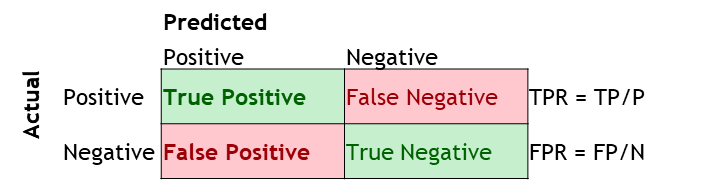

It is also often explained as the plot between sensitivity (=TP Rate) and 1 – specificity (= 1 – TN Rate =FP rate), but for these discussions we will ignore this nomenclature.  

> Sensitivity = TP/(TP + FN) = TP/P.  Of those +ve, how many were correctly predicted +ve
> Specificity = TN/(TN + FP) = TN/N.  Of those –ve, how many were correctly predicted –ve




**The intuition behind ROC curves**  

- For class predictions, predictive models will often (but not always) output probabilities of belonging to a particular class.  
- For example, logistic regression will provide the probabilities of belonging to a particular class, but not a firm decision.  Consider the output from a logistic regression model, you can see the probabilities of belong to a class.  
- In such situations, the analyst has to decide what cut-off to use for deciding class membership.  
- Generally the default is set at 50%, ie if the prob is greater than 50%, the observation belongs to a class, otherwise not.  
- In multi-category classification problems, the default rule is to assign to the class with the highest probability.  
- As we discussed earlier, the costs of FPs and FNs may be asymmetrical, and we may wish to adjust the threshold manually to obtain the right mix between FPs and FNs.  
- For example, we may want to increase TP rate (thereby reducing false negatives), even if it means increasing the FP rate.  
- The ROC curve is a visualization of the FP rate and the TP rate at different thresholds.  Essentially, it is a plot of the table below.  

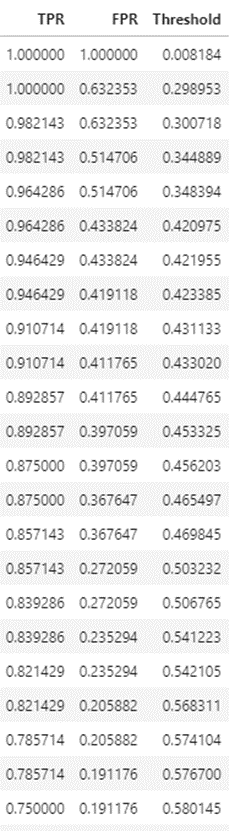

- Below is an ROC curve for a two class classification problem.

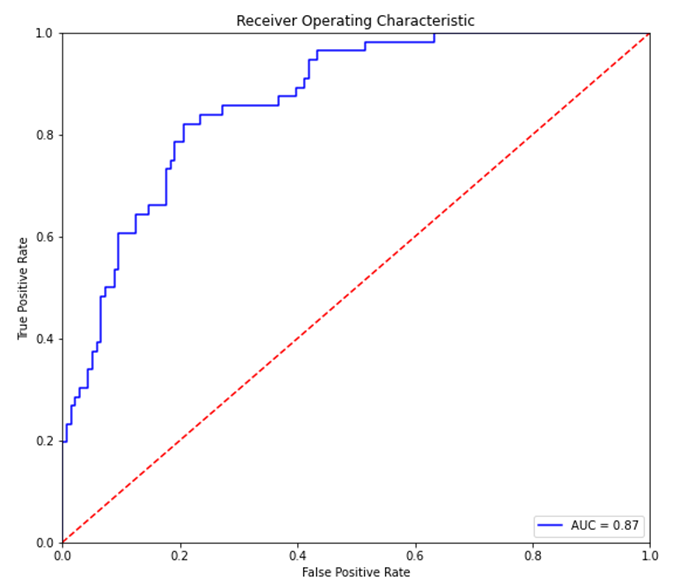

- The blue line represents the trade-off between TP and FP rates.  
- The red line represents the results of a random classifier.  The higher the blue line is compared to the red line, the better our classifier is.  
- The top left of the graph (where FP rate = 0, and TP rate = 1) is the most desirable point.  
- The area under the blue line is the AUC metric, and in a perfect situation would be equal to 1.  

## Bias vs Variance

Bias means poor performance on the training data.  Variance means good performance on the training data but poor performance on the validation or test data

> Bias = Underfitting  
> Variance = Overfitting  


- Bias – treat with changing the model, relax restrictions on model (eg tree depth, or network size)  
- Variance – treat with more data, regularization, or a different model type  


## The Machine Learning Workflow

As we get to building models, below is the workflow we will follow.  And we will see this in operation so many times, that it will become almost second nature.  
1. Prepare your data – cleanse, convert to numbers, etc  
2. Split the data into training and test sets  
        a. Training sets are what algorithms learn from  
        b. Test sets are the ‘hold-out’ data on which model effectiveness is measured  
        c. No set rules, often a 80:20 split between train and test data suffices.  If there is a lot of training data, you may keep a smaller number as the test set.  
3. Fit a model.   
4. Check model accuracy based on the test set.   
5. Use for predictions.  

